<a href="https://colab.research.google.com/github/yash-datascience/Play-Store-App-Review-Analysis-/blob/main/CH_Team_Reality_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##***“Amazing things will happen when you listen to the consumer.”*** –Jonathan Midenhall, CEO of TwentyFirstCenturyBrand

As rightly said by Ex CMO of AirBnB, Jonathan MidenHall, the key to success of any apps lies with the user and it's use case. And what else could possibly lead to a failure if the brand doesn't listen to the customers? Nothing!

We have been given two datasets:
1. Play Store Data
2. User review Data

Let's dive into the world of App data and see what possible conclusions we could make to increase the app engagement and ensure success by leveraging the power of Python and it's powerful libraries like Pandas, Numpy for Data Manipulation; Matplotlib & Seaborn for beautiful visualisations and several other libraries that could help us throughout journey of data analysis. 

#**Libraries Loading..........**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 14

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading** **data**

In [ ]:
# Loading up the data
data = pd.read_csv("/content/drive/MyDrive/AlmaBetter Team Reality Capstone Project/Play Store Data.csv")

In [ ]:
#Please delete, for running purpose i have given my file path
path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Python Capstone Project/Copy of Play Store Data.csv'
data = pd.read_csv(path)

In [ ]:
# checking the shape of the data
np.shape(data)

(10841, 13)

# **Expolatory Data Analysis**
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#**Talking to Data:**

It is imperative to perform a preliminary analysis of the dataset to get an overall idea of the sample or entire dataset. We usually prefer head, tail, info and describe methods to perform this operation.  


In [ ]:
# printing first five rows of data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#statistical description
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**What data says?**
There are 10841 rows and 13 columns, dataset seems to have missing values most of which occurs for the Rating column, all the other column except Rating are in object datatype. 

#**Conclusion: The Cleanup is required**
1. Data needs cleaning
2. Possible datatype conversions
3. Presence of outliers & anomalies

#**The Cleanup Begins**
One of the most important steps in any data analysis is to clean the data which includes handling missing values if any; check for duplicate entries and cleaning if any;  finding the outliers in columns and dealing with them as well etc. 

##Checking for Doppelgängers



In [ ]:
#checking for duplicate rows across dataframe
duplicate = data[data.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


##**Goodbye Doppelgängers**:
##We have 483 duplicate records which should be dropped. 

In [ ]:
#droping duplicates from original dataframe
data.drop_duplicates(inplace=True)

In [ ]:
# displaying info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# droping the last three columns of the dataframe
# data = data.drop(['Last Updated','Current Ver','Android Ver'],axis=1)

##Checking for null values and count

In [ ]:
#checking for null values in data
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

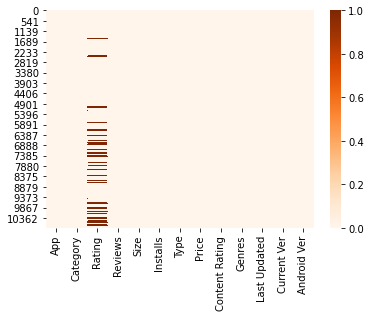

In [ ]:
#visualizing missing data values
sns.heatmap(data.isnull(),cmap="Oranges")

## **Handling the Missing Values**

In [ ]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,8893.000000,10358,10358,10358,10357,10358,10357,10358,10358,10350,10355
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842,298,1302,2379
mean,NaN,NaN,4.189542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.545452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Imputation of missing values:
Imputation is a technique of replacing missing value with the most suitable alternative after comparing with non missing value concerned with respective columns.

In [ ]:
# mean of rating column is 4.1
# top value of Type is free
# top value of content rating is Everyone
#Lets interpolate these values in our data
#but first remove the gap between the content and rating in content rating cloumn
#Replacing spaces from all columns names
data.columns = data.columns.str.replace(' ','')

#Filling missing Values
data.Rating.fillna(4.1,inplace=True)
data.Type.fillna('Free',inplace=True)
data.ContentRating.fillna('Everyone',inplace=True)
data['AndroidVer'].fillna('4.1 and up',inplace=True)
data['CurrentVer'].fillna('Varies with device',inplace=True)

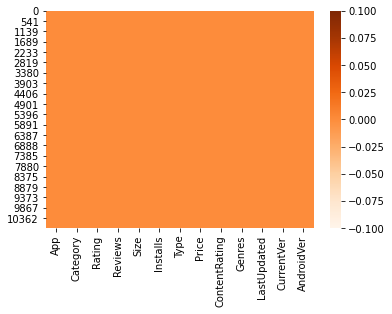

In [ ]:
#checking for null again
sns.heatmap(data.isnull(),cmap="Oranges")

#**Handling Outliers:**
Outliers are values that differs significantly from the rest of the values in a dataset. 

##Finding & Handling Outliers:

In [ ]:
# Rating has the heighest value of 5 let see if we have some more than that
data[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [ ]:
#subsetted for a separate alternative experiment on file size
df_play_store = data[['Size']].copy()


##By looking at the single row we cannot determine which value is actually missing causing rating to go so much high and category as a numeric value.For this purpose, we have iloc and loc function.


In [ ]:
data.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


###We can clearly see that **row 10472** has missing data for the ***Category*** column and all the prevailing column values are being replaced with its previous column. A better idea will be to drop this row from our data frame.

### Invader Droped

In [ ]:
data.drop([10472],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10357 non-null  object 
 1   Category       10357 non-null  object 
 2   Rating         10357 non-null  float64
 3   Reviews        10357 non-null  object 
 4   Size           10357 non-null  object 
 5   Installs       10357 non-null  object 
 6   Type           10357 non-null  object 
 7   Price          10357 non-null  object 
 8   ContentRating  10357 non-null  object 
 9   Genres         10357 non-null  object 
 10  LastUpdated    10357 non-null  object 
 11  CurrentVer     10357 non-null  object 
 12  AndroidVer     10357 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###From the info, it was clear that the some of the columns datatype are objects which could be converted to int or float for analysis, hence removing the symbols are important. Eg, size column has size in MB, KB formats. 

In [ ]:
# removing unwanted symbols from Price, Installs and Size
data['Price'] = data['Price'].str.replace('$','')
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')
data['Size'] = data['Size'].str.replace('M','')
data['Size'] = data['Size'].str.replace('k','')
data['Size'] = data['Size'].str.replace('+','')

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Converting reviews installs to int and price to float

data['Reviews'] = data['Reviews'].astype(int)
data['Installs'] = data['Installs'].astype(int)
data['Price'] = data['Price'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10357 non-null  object 
 1   Category       10357 non-null  object 
 2   Rating         10357 non-null  float64
 3   Reviews        10357 non-null  int64  
 4   Size           10357 non-null  object 
 5   Installs       10357 non-null  int64  
 6   Type           10357 non-null  object 
 7   Price          10357 non-null  float64
 8   ContentRating  10357 non-null  object 
 9   Genres         10357 non-null  object 
 10  LastUpdated    10357 non-null  object 
 11  CurrentVer     10357 non-null  object 
 12  AndroidVer     10357 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


#**Main Course starts from here..!!**:
It deals with the deep analysis of dataset to find anomalies, patterns that could lead us to conclusions and inferences via data visualisations using graphs and tables.  


##*Analysis of Single Column ( Univariate Analysis)*

##**Category:** Has the different categories of apps

In [ ]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
data.Category.value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

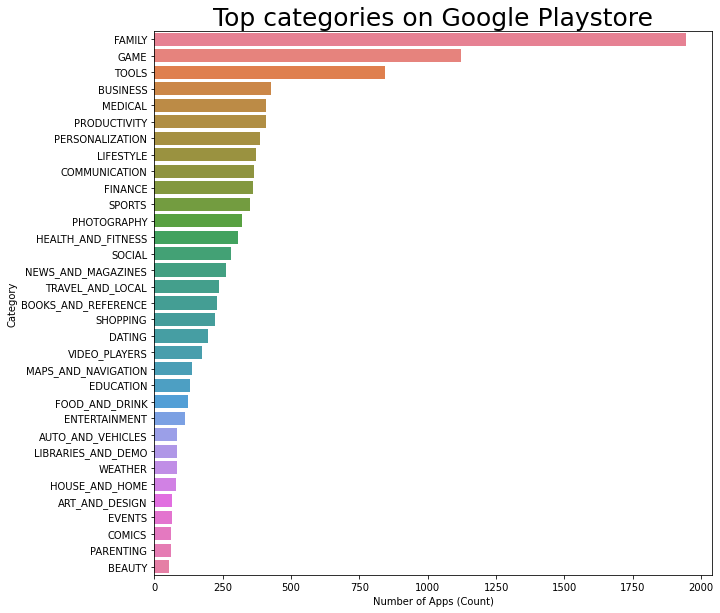

In [ ]:
#Ploting the Category Popularity wise
y = data['Category'].value_counts().index
x = data['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

plt.figure(figsize = (10, 10))
plt.xlabel("Number of Apps (Count)")
plt.ylabel("Category")
ax = sns.barplot(x = xsis, y = ysis, palette= "husl")
ax.set_title("Top categories on Google Playstore", fontsize = 25)
plt.show()

###There are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under ***Family & Game*** category and least are of ***Beauty & Parenting*** Category.

##**Rating**: Has the ratings given to different apps ranging from 0 - 5 

In [ ]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
above_4_rating = data[data['Rating']>4]

In [ ]:
above_4_rating.Rating.value_counts()

4.1    2122
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.7     484
5.0     271
4.8     228
4.9      87
Name: Rating, dtype: int64

##Count Plot

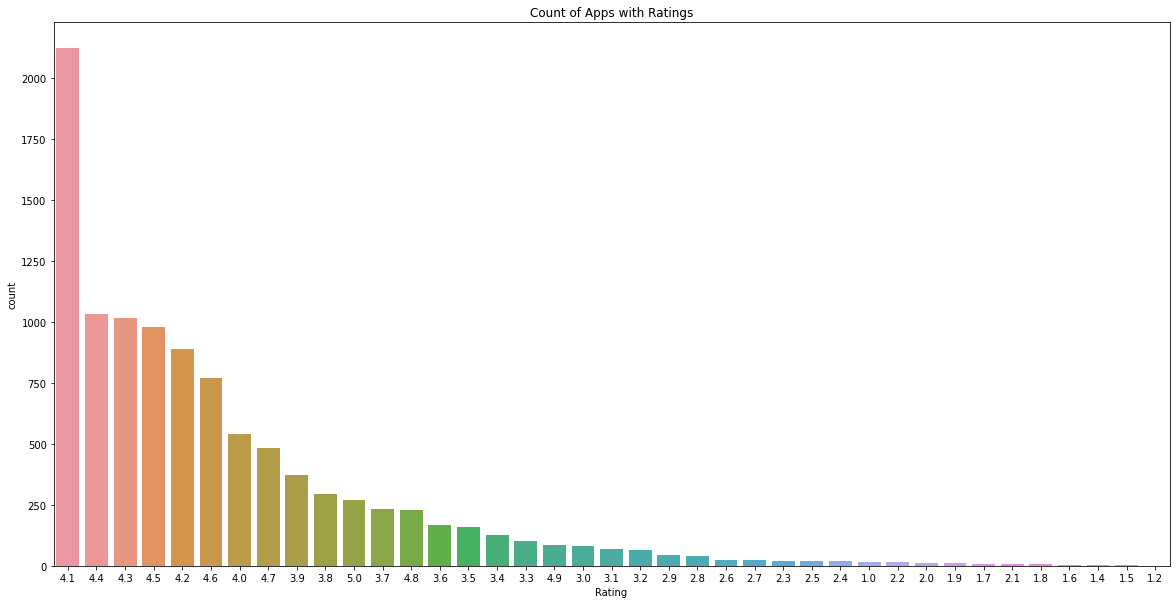

In [ ]:
#visualizing count of apps with average rating
plt.figure(figsize = (20, 10))
sns.countplot(x='Rating',data=data,order=data.Rating.value_counts().index)
plt.title('Count of Apps with Ratings')
plt.show()

##Distribution Plot

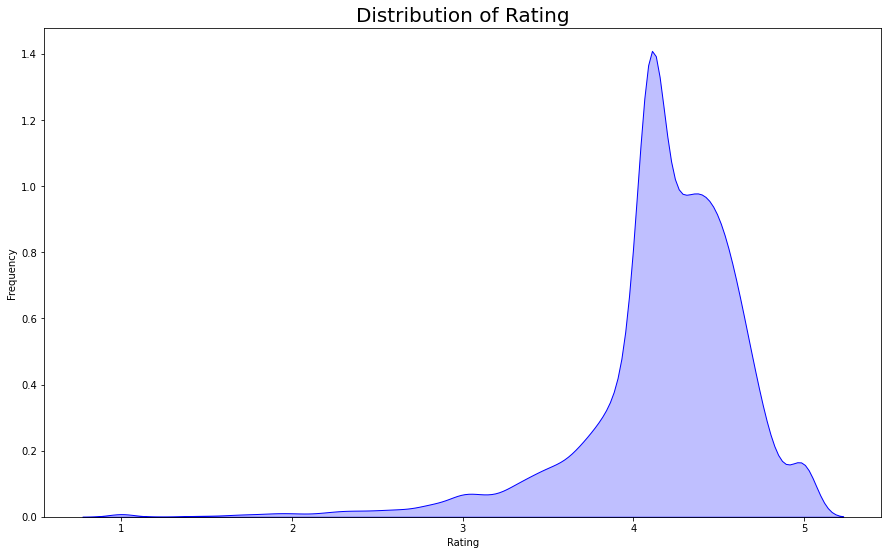

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
ax = sns.kdeplot(data.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

###From the above distribution plot we can infer that large number of apps were rated between 3.8 to 4.8

##Count plot of rating based on defined Categories according to rating interval

In [ ]:
def rat_to_words(input_ratings):
  '''
  function to convert ratings to resp translation
  '''
  if input_ratings >= 4:
    return 'Best Rated(ratings above 4)'
  elif (input_ratings >= 3) and (input_ratings < 4):
    return 'Average Rated(ratings between 3 and 4)'
  else:
    return 'Worst Rated(ratings below 3)'

Text(0.5, 1.0, 'Number of Apps rated in different category')

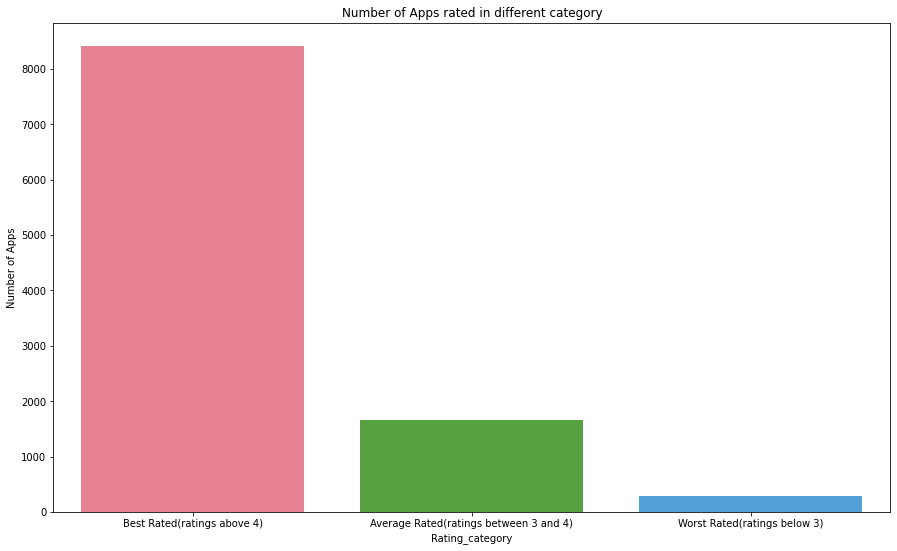

In [ ]:
data['Rating_category'] = data['Rating'].apply(lambda x: rat_to_words(x) )
plt.figure(figsize=(15,9))
ax = sns.countplot(x="Rating_category", data= data, palette='husl')
plt.ylabel('Number of Apps')
plt.title('Number of Apps rated in different category')

##**Inference:** Most of the apps are rated above 4 and the max rating distribution lies between 4-5

##**Size**

In [ ]:
data[['Size']]

,Size
0,19
1,14
2,8.7
3,25
4,2.8
...,...
10836,53
10837,3.6
10838,9.5
10839,Varies with device


In [ ]:
data.Size.value_counts().head(10)

Varies with device    1526
11                     189
13                     186
12                     186
14                     183
15                     174
17                     157
26                     147
16                     143
19                     135
Name: Size, dtype: int64

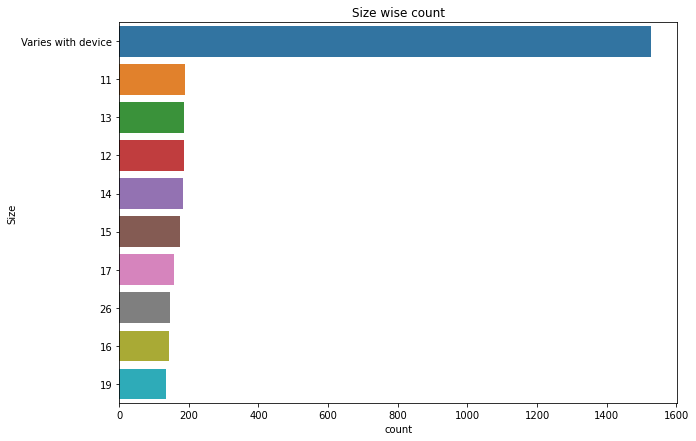

In [ ]:
#visualizing Size wise count 
plt.figure(figsize = (10,7))
sns.countplot(y='Size',data=data,order=data.Size.value_counts().head(10).index)
plt.title('Size wise count')
plt.show()

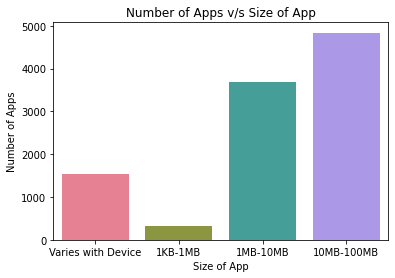

<Figure size 576x360 with 0 Axes>

In [ ]:
#A function is defined to account for these units so that it could be converted to float
def return_size_new(input_str):
  '''
  func to convert size to float
  '''
  if input_str[-1] == 'M':
    input_str =input_str.replace('M','e6')
  elif input_str[-1] == 'k':
    input_str=input_str.replace('k',',e3')
  elif input_str == 'Varies with device':
    input_str=input_str.replace('Varies with device','0')
  else:
    input_str =input_str.replace('+','')
  if input_str.find(','):
    input_str=input_str.replace(',','')
  return input_str
#func applied on each row
df_play_store['size_new'] = df_play_store['Size'].apply(lambda x: return_size_new(x))
df_play_store['size_new'] = df_play_store['size_new'].astype(float)
df_play_store.head()
#checking for various size formats value counts 
df_play_store['size_new'].value_counts()
bins = [0,1,1000000,10000000,100000000]
df_plot = df_play_store['size_new'].value_counts(bins=bins, sort=False).to_frame()
df_plot = df_plot.reset_index()
#plot for number of apps in different file size range
ax = sns.barplot(y="size_new",x="index", data=df_plot, palette='husl')
positions = (0,1, 2, 3)
labels = ('Varies with Device','1KB-1MB','1MB-10MB','10MB-100MB')
plt.xticks(positions, labels)
plt.xlabel('Size of App')
plt.ylabel('Number of Apps')
plt.title('Number of Apps v/s Size of App')
plt.figure(figsize = (8,5))
plt.show()


 ## **Installs column:** Install column has the number of installs for each app.

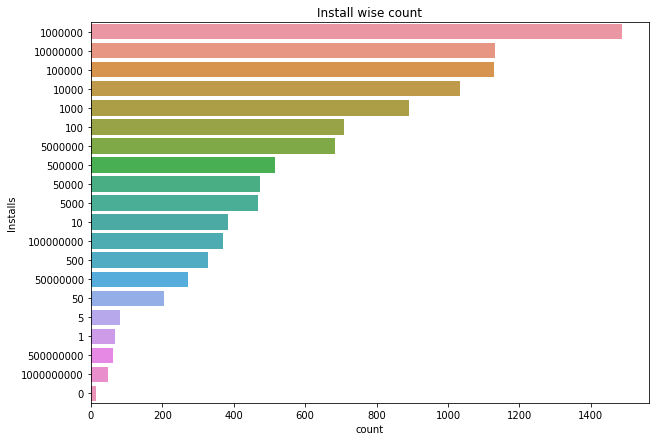

In [ ]:
#visualizing Size wise count 
plt.figure(figsize = (10,7))
sns.countplot(y='Installs',data=data,order=data.Installs.value_counts().index)
plt.title('Install wise count')
plt.show()

In [ ]:
data.Installs.value_counts()

1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: Installs, dtype: int64

##***Category of Apps with highest number of installs***

In [ ]:
highest_Installs = data.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

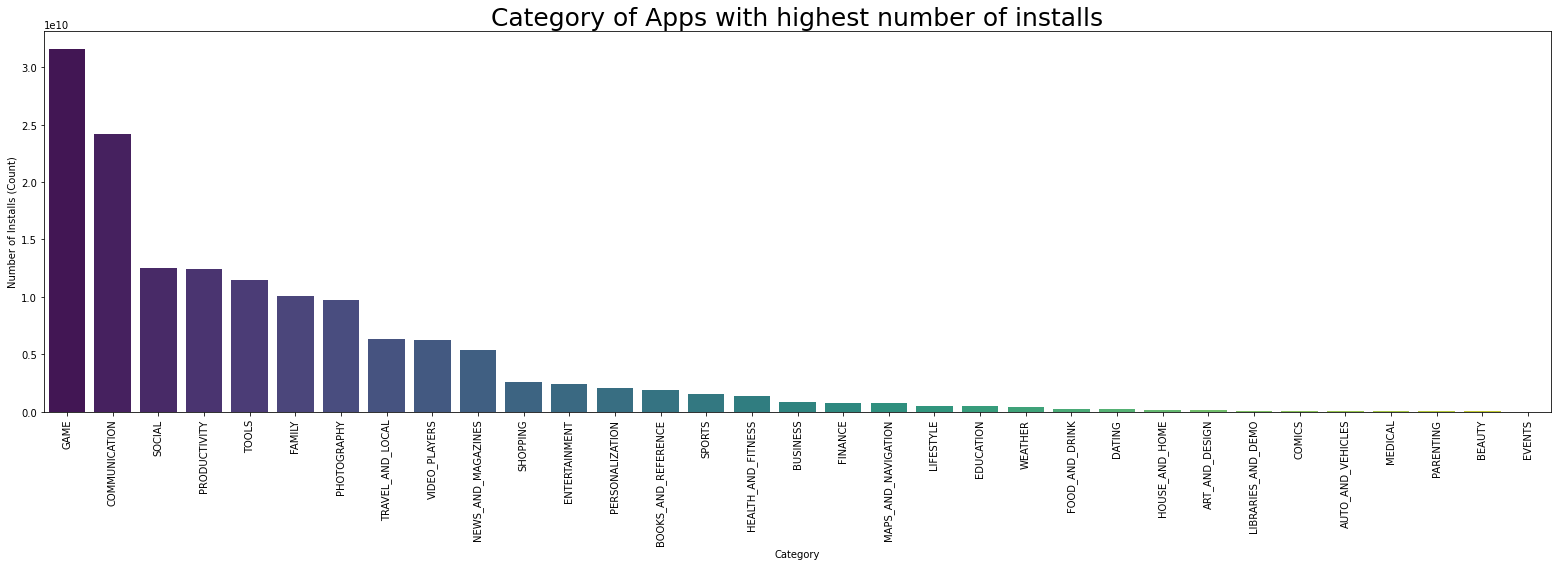

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs)):
    x2sis.append(highest_Installs.Installs[i])
    y2sis.append(highest_Installs.index[i])
plt.figure(figsize = (27, 7))
plt.xlabel("Category")
plt.ylabel("Number of Installs (Count)")
plt.xticks(rotation = 90)
ax = sns.barplot(x = y2sis, y = x2sis, palette= "viridis")
ax.set_title("Category of Apps with highest number of installs", fontsize = 25)
plt.show()

##From the above visualization, it can be interpreted that the top categories with the highest installs are Game, Family, Communication, News & Magazines, & Tools.

## Dataframe for top 10 most downloaded apps

In [ ]:
#apps with top downloads via groupby
df_top_app = data.groupby(['App','Type','Installs'])['Installs'].mean().to_frame()
df_top_app.index.names=['App','Type','Install']
df_top_app= df_top_app.reset_index()
df_top_app = df_top_app.sort_values(by='Installs',ascending=False)[:20]

In [ ]:
#dataframe 
#apps with top downloads via groupby
df_top_app.drop(columns=['Install'])

,App,Type,Installs
4928,Google Chrome: Fast & Secure,Free,1000000000
4945,Google Play Books,Free,1000000000
4947,Google Play Movies & TV,Free,1000000000
4951,Google Street View,Free,1000000000
4944,Google Photos,Free,1000000000
7856,Skype - free IM & video calls,Free,1000000000
4931,Google Drive,Free,1000000000
4956,Google+,Free,1000000000
9055,WhatsApp Messenger,Free,1000000000
8092,Subway Surfers,Free,1000000000


##***Top 10 installed apps in any category***

This function can find top 10 installed apps in any category we provide as an argument

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = data[data['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(10,7))
    plt.title('Top 10 Installed Apps',size = 20) 
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

## Lets find top 10 apps for business

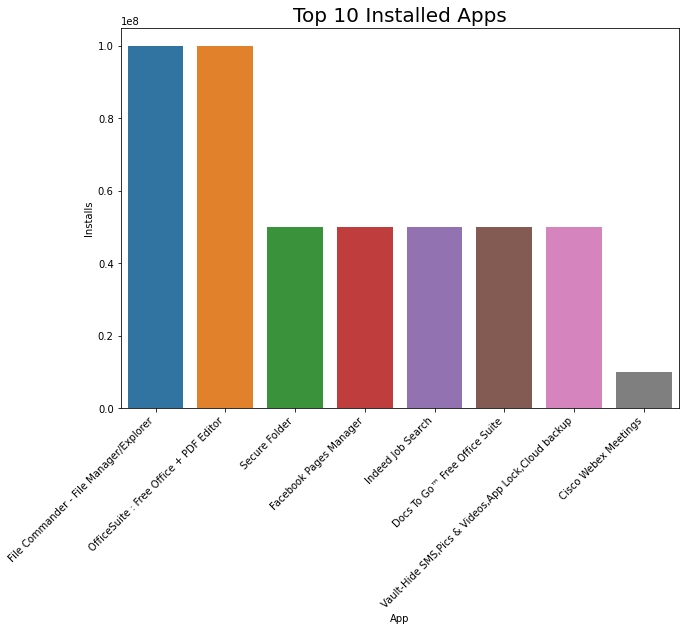

In [ ]:
findtop10incategory('Business')

###From above graph we can infer that ***File Commander and OfficeSuite*** are the most installed apps from 'Business' Category.

## ***Top 10 expensive Apps in the Play Store***

In [ ]:
top10PaidApps = data[data['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)


In [ ]:
# Dropping name of app to make graph look cleaner
top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


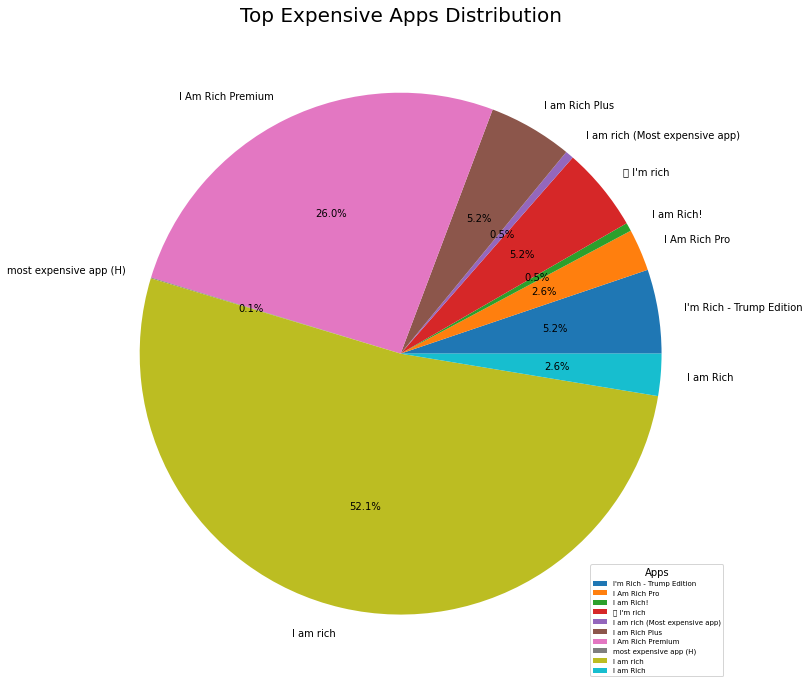

In [ ]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "x-small"
          );

###From the above graph, we can interpret that the App I am rich is the most expensive app in the google play store followed by I am Rich Premium. we also had to drop one-row data for this visualization because the language of the app was Chinese and it was messing with the pie chart, visualization.

## ***Apps with the highest number of reviews***

In [ ]:
Apps_with_Highest_review = data[['App','Reviews']].sort_values(by='Reviews', ascending=False).head(10)
Apps_with_Highest_review

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
1879,Clash of Clans,44893888


# ***Apps with highest-earning*** 

In [ ]:
Paid_Apps = data[data['Type'] == 'Paid']

In [ ]:
earnings = Paid_Apps[['App', 'Installs', 'Price']]
earnings['Earnings'] = earnings['Installs'] * earnings['Price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sorted_by_Earnings = earnings.sort_values(by='Earnings', ascending=False).head(20)
sorted_by_Price = sorted_by_Earnings.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


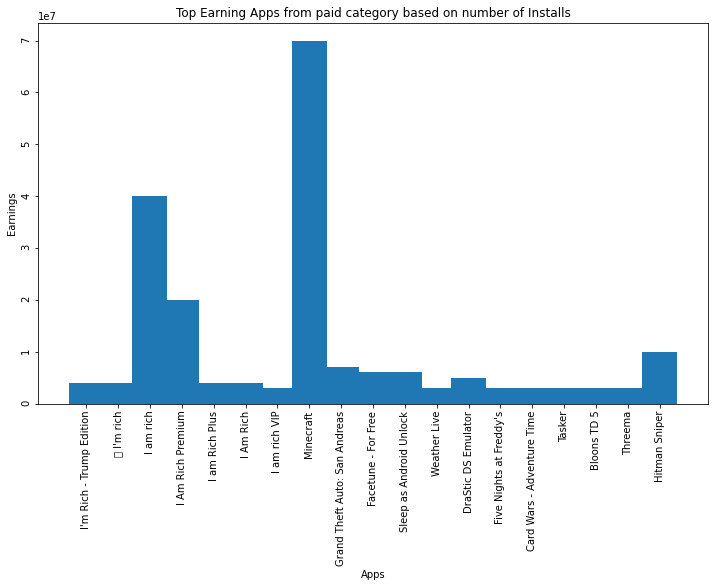

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(sorted_by_Price.App, sorted_by_Price.Earnings, width=1.1, label=sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps from paid category based on number of Installs");

###From the above histogram we can infer that ***Minecarft*** has earned more money based on the number of installs than any other app present on play store.

###**Type**

In [ ]:
data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
data.Type.value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

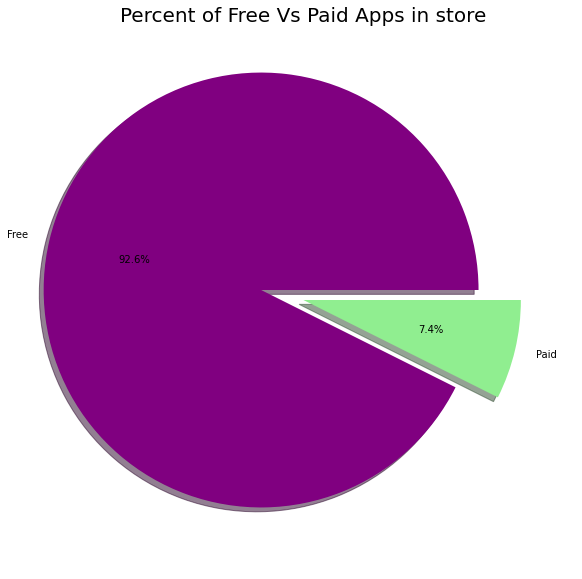

In [ ]:
plt.figure(figsize=(10,10))
labels = data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)
colors = ["purple","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

###From the above graph, we can infer that ***92.6%*** of apps in the google play store are free and only ***7.4%*** are paid.

##Content Rating

##***Top Category of Apps from the ‘Content Rating’ column***

In [ ]:
data.ContentRating.value_counts()

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: ContentRating, dtype: int64

In [ ]:
x2 = data['ContentRating'].value_counts().index
y2 = data['ContentRating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

Text(0.5, 0, 'Content Rating')

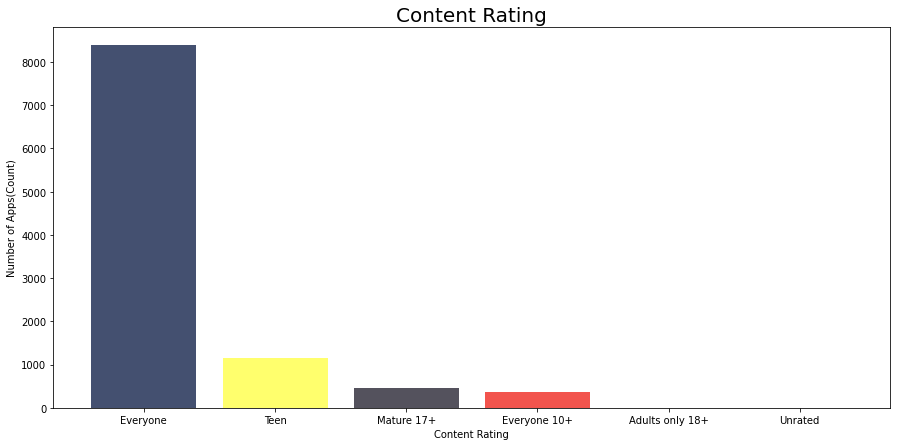

In [ ]:
#visualizing Content Rating wise count 
plt.figure(figsize = (15,7))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8)
plt.title('Content Rating',size = 20)
plt.ylabel('Number of Apps(Count)')
plt.xlabel('Content Rating')

##From the above plot, we can infer that the ***Everyone*** category has around ***8382 apps*** which makes it the category in Content Rating with the highest number of apps.

##**Genres**

In [ ]:
# Genres wise count, it will depict most commonly used Genres
data.Genres.value_counts()

Tools                         842
Entertainment                 588
Education                     527
Business                      427
Medical                       408
                             ... 
Role Playing;Education          1
Health & Fitness;Education      1
Comics;Creativity               1
Board;Pretend Play              1
Trivia;Education                1
Name: Genres, Length: 119, dtype: int64

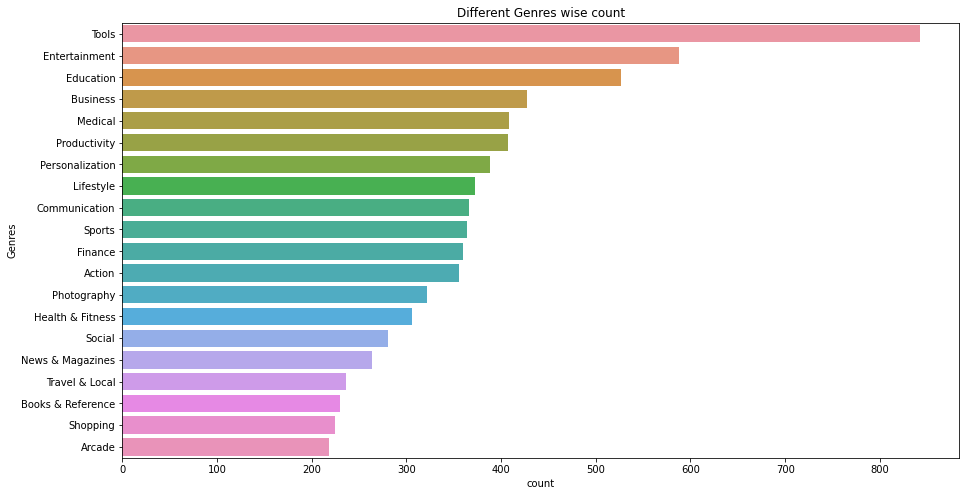

In [ ]:
# visualizing Size wise count 
plt.figure(figsize = (15,8))
sns.countplot(y='Genres',data=data,order=data.Genres.value_counts().head(20).index)
plt.title('Different Genres wise count')
plt.show()

###From this plot, we can infer that **TOOLS** Genre has the most number of apps

#**Last Updated**

In [ ]:
# We are taking year wise count of App Updation
# We need to change data in standard Format, it's format is String need to convert to Date Format
data['LastUpdated'] = pd.to_datetime(data['LastUpdated'])
data['year'] = data['LastUpdated'].dt.to_period('Y')
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Rating_category,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Best Rated(ratings above 4),2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Average Rated(ratings between 3 and 4),2018


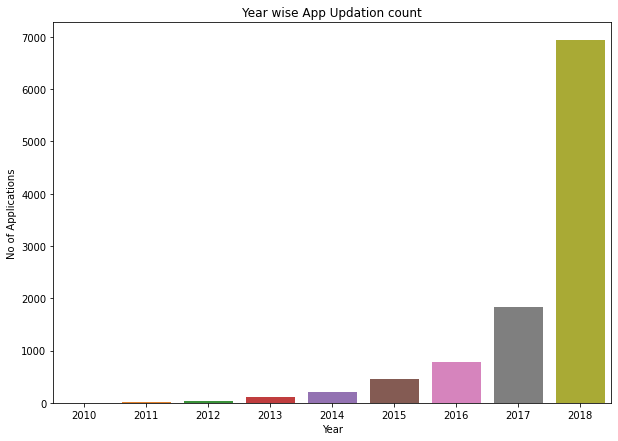

In [ ]:
#Plotting the count plot
plt.figure(figsize = (10,7))
sns.countplot(x='year',data=data,order=data.year.value_counts().sort_values().index)
plt.title('Year wise App Updation count')
plt.xlabel('Year')
plt.ylabel('No of Applications')
plt.show()

###From this plot, we can infer how many number of applications are updating yearly, the most number of apps are updated in **2018**

#**In this plot we will check what Category of applications are not being updated before 2017**

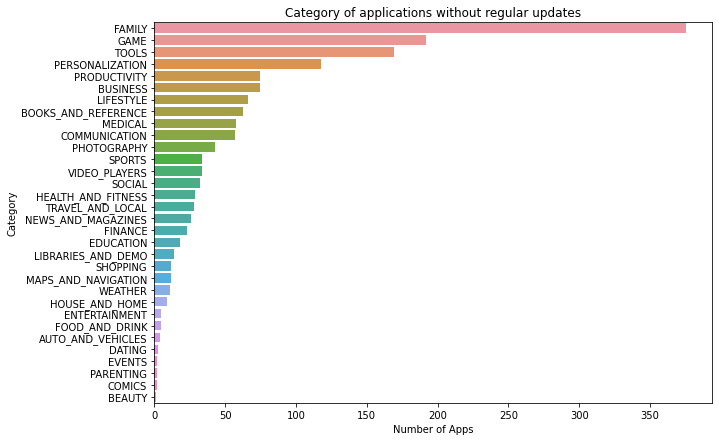

In [ ]:
# these are the applications whose last update date is less than 2016,we have 354 applications which needed work to push updates
app_df1 = data[data['year'] <= '2016']
plt.figure(figsize = (10,7))
sns.countplot(y='Category',data=app_df1,order=app_df1.Category.value_counts().sort_values(ascending=False).index)
plt.title('Category of applications without regular updates')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

###From this plot, we can infer that **Family**, followed by **Games** Category has the most number of apps which are not updated recently

##**Android Ver**

In [ ]:
# this data shows how many applications support what range of android version
data['AndroidVer'].value_counts()

4.1 and up            2381
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: AndroidVer, dtype: int64

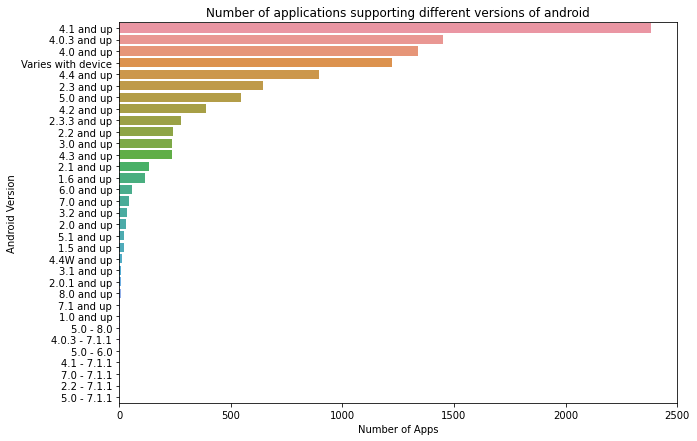

In [ ]:
#Plotting Count plot for Android Ver
plt.figure(figsize = (10,7))
sns.countplot(y='AndroidVer',data=data,order=data['AndroidVer'].value_counts().index)
plt.title('Number of applications supporting different versions of android')
plt.xlabel('Number of Apps')
plt.ylabel('Android Version')
plt.show()

###From this plot, we can infer that Most number of apps are supporting android Version greater than **4.1**

##**Correlation Matrix**

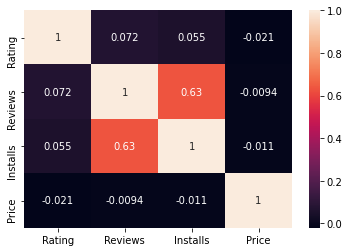

In [ ]:
cm = data.corr()
sns.heatmap(cm,annot=True)

##The correlation between install and reviews is high 

##***Words in the Clouds***

In [ ]:
i#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

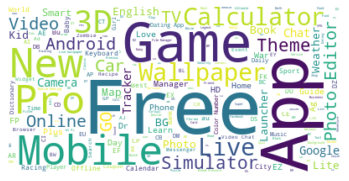

In [ ]:
#subsetting df
df_word_cloud = data[['Category','App']]
text = " ".join(word for word in df_word_cloud.App)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##***Word cloud for top categories!***

In [ ]:
#word cloud for each category
def func_select_Category(category_name):
  df_word_cloud = data[['Category','App']]
  df_word_cloud = df_word_cloud[df_word_cloud['Category']==category_name]
  text = " ".join(word for word in df_word_cloud.App)
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

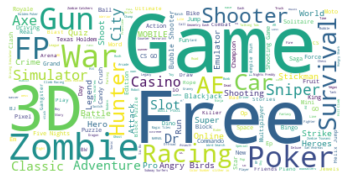

In [ ]:
func_select_Category('GAME')

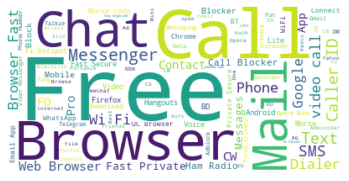

In [ ]:
func_select_Category('COMMUNICATION')

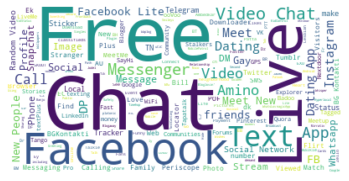

In [ ]:
func_select_Category('SOCIAL')

##**User review** dataset EDA

##Data Preprocessing

In [ ]:
df_user_rating = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Python Module/Capstone Project/User Reviews.csv')

In [ ]:
#head of value
df_user_rating.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_user_rating.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df_user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_user_rating.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,"CBS Sports App - Scores, News, Stats & Watch Live",Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


##Check for correlation between column of numeric types

In [ ]:
df_user_rating[['Sentiment_Polarity','Sentiment_Subjectivity']].dropna().corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


**Inference:** slightly positive correlation between columns

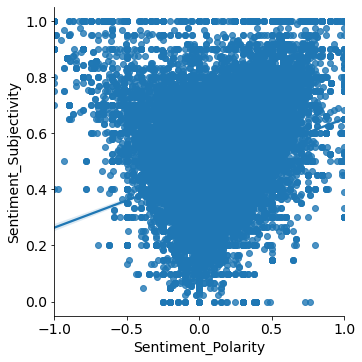

In [ ]:
sns.lmplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', data=df_user_rating, fit_reg=True)

Inference: Slightly positive correlation.

##Boxplot to show ranges of numeric column

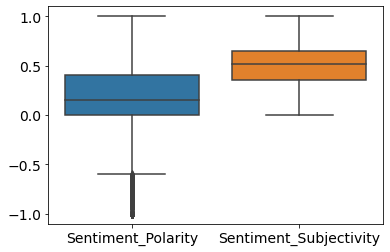

In [ ]:
sns.boxplot(data=df_user_rating)

In [ ]:
df_sentiment_app = df_user_rating[['App','Sentiment']].dropna()
df_sentiment_app = df_sentiment_app.value_counts().to_frame().reset_index()
df_positive = df_sentiment_app[df_sentiment_app['Sentiment']=='Positive'].sort_values(by=0,ascending=False)[:10]

##***Top 10 apps having most number of positive reviews***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

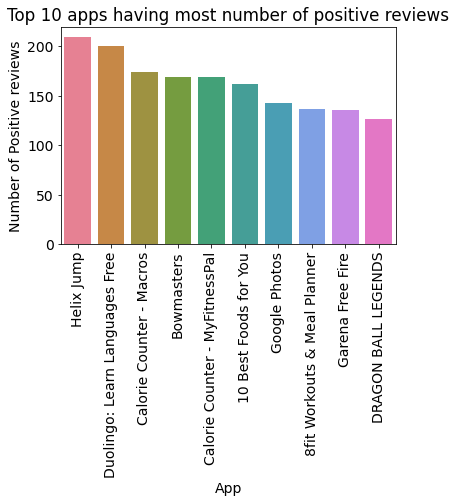

In [ ]:
sns.barplot(x="App", y=0,data=df_positive,palette='husl')
plt.xlabel('App')
plt.ylabel('Number of Positive reviews')
plt.title('Top 10 apps having most number of positive reviews')
plt.xticks(rotation=90)

##***Top 10 apps having most number of negative reviews***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

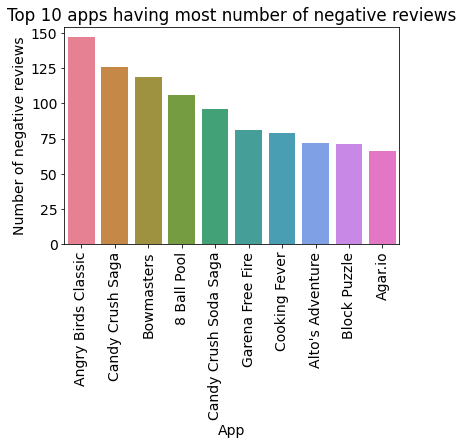

In [ ]:
df_negative = df_sentiment_app[df_sentiment_app['Sentiment']=='Negative'].sort_values(by=0,ascending=False)[:10]
sns.barplot(x="App", y=0,data=df_negative,palette='husl')
plt.xlabel('App')
plt.ylabel('Number of negative reviews')
plt.title('Top 10 apps having most number of negative reviews')
plt.xticks(rotation=90)

##***Count plot for type of reviews and respective number of apps***

Text(0.5, 1.0, 'Type v/s number of reviews')

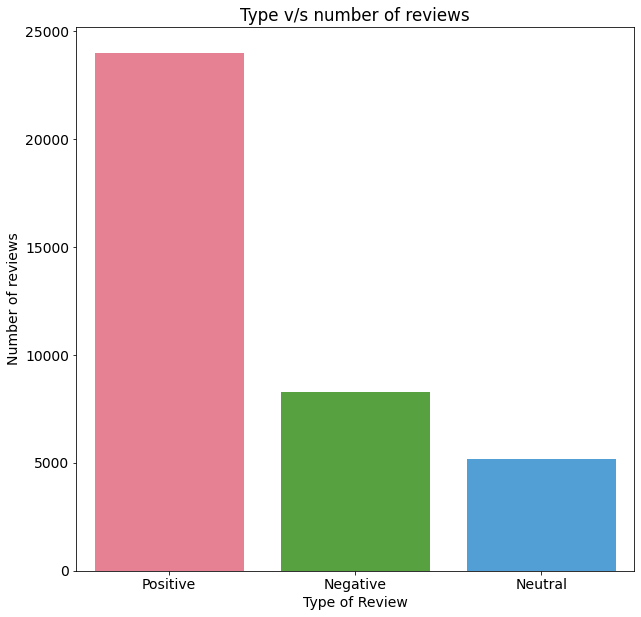

In [ ]:
#countplot for type V/s number of apps
plt.figure(figsize = (10, 10))
sns.countplot(x="Sentiment", data=df_user_rating,order=df_user_rating.Sentiment.value_counts().index,palette='husl')
plt.xlabel('Type of Review')
plt.ylabel('Number of reviews')
plt.title('Type v/s number of reviews')

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name):
  df_word_cloud = df_user_rating[['Sentiment','Translated_Review']].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['Sentiment']==category_name]
  text = " ".join(word for word in df_word_cloud.Translated_Review)
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

## Word cloud for positive reviews

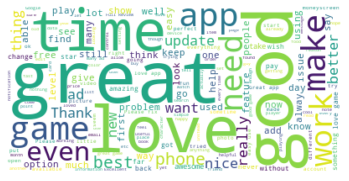

In [ ]:
func_select_Category('Positive')

## Word cloud for negative reviews

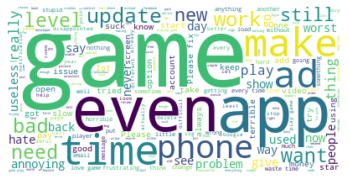

In [ ]:
func_select_Category('Negative')

## Word cloud for neutral reviews

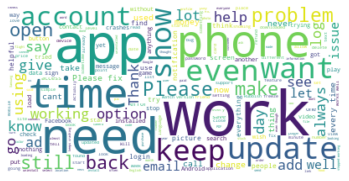

In [ ]:
func_select_Category('Neutral')

#**Project Motivation**:
Following are the questions I'm looking to answer:

What category of apps should a developer target for bursting onto the scene?
Does size of an app affect its popularity?
How do paid apps fare against free apps in terms of populariy?
What makes an app 'successful' on play store?
#**Results**:
A Developer should target categories which have high demand but lack of quality apps like Family, Games and Communications.
Most users prefer downloading apps if app size is below 100 MB.
Paid apps are not much downloaded by users. Whenever possible users opt for free alternatives.
Developer should opt for a business model which is not fully paid (as it will lead to less downloads), and not fully ad supported as well (which leads to lower ratings). A sweet spot between both is having ads in free version and an option for user to remove those by paying a premium.